svm project

In [1]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data Preprocessing
from sklearn.model_selection import train_test_split

#Models ML
from sklearn.svm import SVC
#Metrics
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import accuracy_score, classification_report


In [2]:
data = pd.read_csv("framingham_heartdisease.csv")
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### **Data Cleaning**

In [3]:
row,cols = data.shape
print("Number of rows:",row)
print("Number of columns:",cols)

Number of rows: 4238
Number of columns: 16


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [5]:
data = data.dropna()

In [6]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000
mean,0.443654,49.557440,1.979759,0.489059,9.022155,0.030361,0.005744,0.311543,0.027079,236.873085,132.368025,82.912062,25.784185,75.730580,81.856127,0.152352
std,0.496883,8.561133,1.022657,0.499949,11.918869,0.171602,0.075581,0.463187,0.162335,44.096223,22.092444,11.974825,4.065913,11.982952,23.910128,0.359411
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.250000,144.000000,90.000000,28.040000,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [7]:
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


In [8]:
# TenYearCHD is dependent variables as we will be verifying the ten year cronary heart desease on the basis of above varibales
# finding total length
print(len(data[data['TenYearCHD']==1]))
print(len(data[data['TenYearCHD']==0]))

557
3099


In [9]:
# taking shuffel data and balancing equal data
data1 = data[data['TenYearCHD']==1]
data0 = data[data['TenYearCHD']==0].sample(frac = 1).iloc[0:557]
data = pd.concat([data1,data0])


In [10]:
data = data.sample(frac = 1)
data


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3753,0,35,3.0,0,0.0,0.0,0,0,0,190.0,115.0,77.0,23.95,70.0,80.0,0
370,0,40,2.0,0,0.0,0.0,0,0,0,290.0,122.0,85.0,24.06,87.0,70.0,0
2634,0,59,2.0,1,35.0,0.0,0,1,0,345.0,182.5,103.0,31.52,83.0,76.0,1
2786,0,38,2.0,1,5.0,0.0,0,0,0,179.0,116.5,72.5,21.49,70.0,76.0,0
3277,0,42,2.0,0,0.0,0.0,0,0,0,218.0,122.0,75.0,18.11,100.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2284,1,49,1.0,1,20.0,0.0,0,0,0,206.0,101.0,69.0,28.40,85.0,82.0,0
663,0,59,2.0,1,20.0,0.0,0,1,0,206.0,167.0,89.5,25.83,72.0,75.0,1
2916,0,45,1.0,0,0.0,0.0,0,0,0,210.0,120.0,72.0,22.01,75.0,93.0,0
107,1,40,1.0,1,43.0,0.0,0,1,0,290.0,138.0,90.0,27.54,85.0,73.0,1


In [11]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000
mean,0.484740,51.341113,1.903052,0.498205,9.759425,0.041293,0.008977,0.385996,0.045781,240.822262,136.451077,84.162926,26.143205,76.230700,84.824955,0.500000
std,0.499992,8.763150,1.027707,0.500221,12.650159,0.199056,0.094361,0.487048,0.209104,45.661228,24.574987,12.988182,4.318185,11.939188,32.140875,0.500225
min,0.000000,33.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,124.000000,83.500000,48.000000,15.960000,50.000000,40.000000,0.000000
25%,0.000000,44.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,210.250000,119.000000,75.000000,23.130000,68.000000,72.000000,0.000000
50%,0.000000,51.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,238.000000,132.000000,83.000000,25.725000,75.000000,78.000000,0.500000
75%,1.000000,59.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,267.000000,149.000000,91.375000,28.620000,84.000000,88.000000,1.000000
max,1.000000,69.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,140.000000,56.800000,125.000000,394.000000,1.000000


## **Exploratory data analysis**

In [12]:
new_data = data.iloc[:,:-1]  # only taking independent variables
new_data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
3753,0,35,3.0,0,0.0,0.0,0,0,0,190.0,115.0,77.0,23.95,70.0,80.0
370,0,40,2.0,0,0.0,0.0,0,0,0,290.0,122.0,85.0,24.06,87.0,70.0
2634,0,59,2.0,1,35.0,0.0,0,1,0,345.0,182.5,103.0,31.52,83.0,76.0
2786,0,38,2.0,1,5.0,0.0,0,0,0,179.0,116.5,72.5,21.49,70.0,76.0
3277,0,42,2.0,0,0.0,0.0,0,0,0,218.0,122.0,75.0,18.11,100.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2284,1,49,1.0,1,20.0,0.0,0,0,0,206.0,101.0,69.0,28.40,85.0,82.0
663,0,59,2.0,1,20.0,0.0,0,1,0,206.0,167.0,89.5,25.83,72.0,75.0
2916,0,45,1.0,0,0.0,0.0,0,0,0,210.0,120.0,72.0,22.01,75.0,93.0
107,1,40,1.0,1,43.0,0.0,0,1,0,290.0,138.0,90.0,27.54,85.0,73.0


In [13]:
new_data.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
male,1.000000,-0.010294,0.032089,0.254948,0.362219,-0.047828,0.021950,0.005763,0.010985,-0.055924,-0.028597,0.083776,0.071726,-0.068870,-0.000921
age,-0.010294,1.000000,-0.140684,-0.196423,-0.178005,0.116566,0.060400,0.317938,0.119444,0.219096,0.387375,0.180469,0.118200,-0.030766,0.123396
education,0.032089,-0.140684,1.000000,-0.000339,0.023015,0.023979,-0.037342,-0.066976,-0.075490,0.038595,-0.108798,-0.033952,-0.122917,-0.036472,-0.047027
currentSmoker,0.254948,-0.196423,-0.000339,1.000000,0.774609,-0.053395,-0.037728,-0.115163,-0.072226,-0.044976,-0.148505,-0.089948,-0.110284,0.077321,-0.072696
cigsPerDay,0.362219,-0.178005,0.023015,0.774609,1.000000,-0.051000,-0.047114,-0.068036,-0.061387,-0.014983,-0.097169,-0.028189,-0.051305,0.124628,-0.061377
BPMeds,-0.047828,0.116566,0.023979,-0.053395,-0.051000,1.000000,0.075916,0.261750,0.084057,0.101241,0.288132,0.205735,0.039441,0.082941,0.107439
prevalentStroke,0.021950,0.060400,-0.037342,-0.037728,-0.047114,0.075916,1.000000,0.080936,0.024689,0.003499,0.065863,0.064051,0.021979,0.011718,0.011183
prevalentHyp,0.005763,0.317938,-0.066976,-0.115163,-0.068036,0.261750,0.080936,1.000000,0.108637,0.144731,0.698261,0.602418,0.293197,0.166840,0.106598
diabetes,0.010985,0.119444,-0.075490,-0.072226,-0.061387,0.084057,0.024689,0.108637,1.000000,0.092978,0.106479,0.052333,0.105123,0.064145,0.692617
totChol,-0.055924,0.219096,0.038595,-0.044976,-0.014983,0.101241,0.003499,0.144731,0.092978,1.000000,0.218875,0.176419,0.117422,0.055980,0.086911


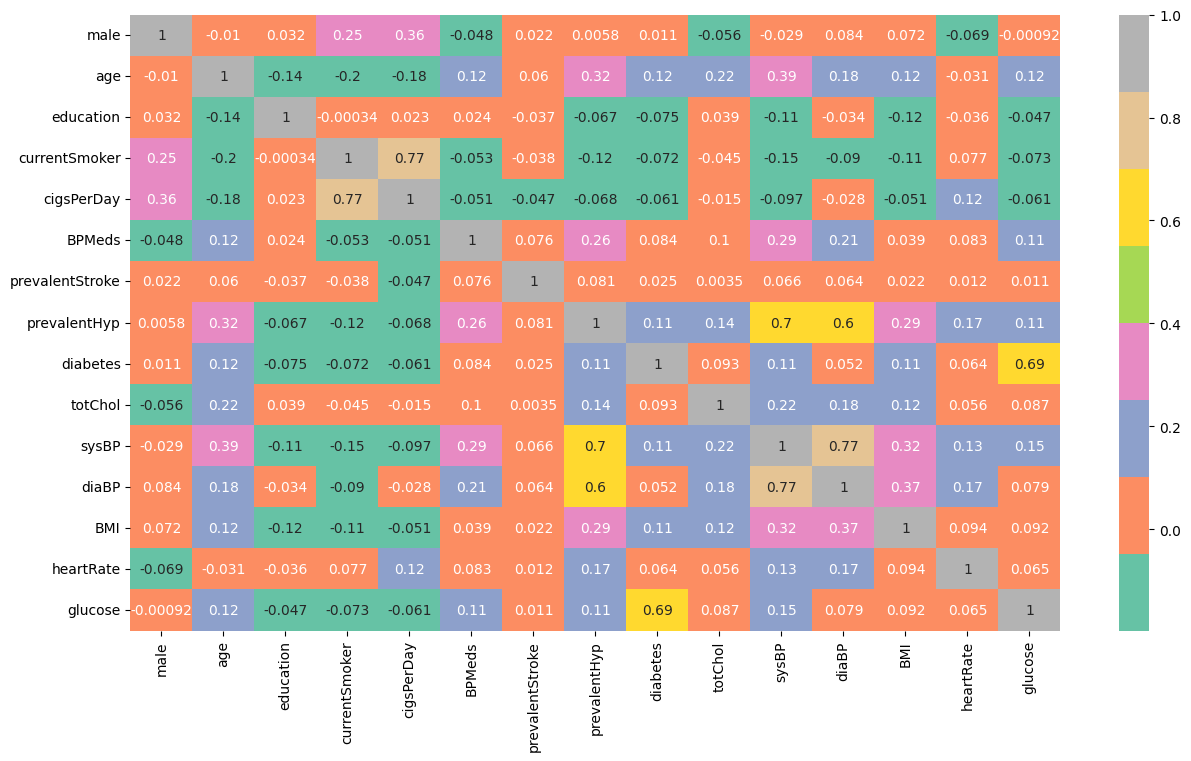

In [14]:
# plotting correlation data
plt.figure(figsize=(15,8))
sns.heatmap(new_data.corr(), annot = True ,cmap = 'Set2')
plt.show()

# **Training and Normalization of Data**

In [15]:

# spliting the data set into training and train dataset using feature value and target values
X = data.iloc[:,:-1].values  # all columns except the last
Y = data.iloc[:,-1].values  # only last colums

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 1)

In [16]:

#model training
svc = SVC()
svc.fit(X_train,Y_train)

SVC()

In [17]:
X_test

array([[  0.  ,  61.  ,   3.  , ...,  33.9 ,  85.  ,  60.  ],
       [  0.  ,  37.  ,   1.  , ...,  24.61,  80.  ,  58.  ],
       [  1.  ,  56.  ,   1.  , ...,  20.12,  62.  ,  87.  ],
       ...,
       [  0.  ,  56.  ,   4.  , ...,  31.11,  75.  ,  77.  ],
       [  0.  ,  65.  ,   1.  , ...,  25.61,  76.  ,  75.  ],
       [  0.  ,  49.  ,   2.  , ...,  18.44, 110.  ,  78.  ]])

In [18]:
Y_pred = svc.predict(X_test) # making predictions
Y_pred

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1])

In [19]:
pd.DataFrame({'Results':list(Y_pred)}) # creating new dataframe with only one column: results

,Results
0,1
1,0
2,0
3,0
4,1
...,...
218,1
219,1
220,0
221,0


In [20]:
# Evaluate the model
svc_accuracy = round(accuracy_score(Y_test, Y_pred),4)*100
svc_accuracy


61.42999999999999

In [22]:
# evaluating model using cm
conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Confusion Matrix:
 [[78 32]
 [54 59]]
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.71      0.64       110
           1       0.65      0.52      0.58       113

    accuracy                           0.61       223
   macro avg       0.62      0.62      0.61       223
weighted avg       0.62      0.61      0.61       223



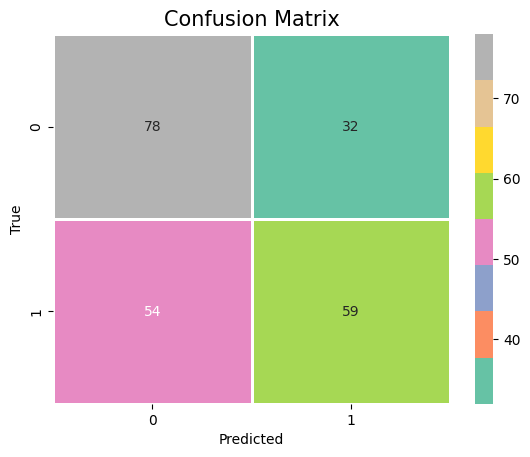

In [30]:
cm=confusion_matrix(Y_test,Y_pred)

class_label = [0, 1]

df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm,annot=True,cmap='Set2',linewidths=2,fmt='d')
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

The confusion matrix demonstrate actual and predicted values in term of 'o' as negative and '1' as positive factors.               
               Predicted
                 0    1
Actual     0   [TN   FP]
           1   [FN   TP]
           The picture explains that the model correctly predicted 78 instances are as class o which is also refered as true negative. The model incorectly predicted 32 intances are class 1 but actually it belongs to class 0. The model incorrectly predicted 54 instances are class 0 but they actually belongs to class 1. The model correctly predicted 59 intances as class 1 (true positive).

### the model has 61% accuracy. It means that the model is moderatly good at predicting positive values. Percesion measures the accuracy of positive predictions. recallmeasures the model's ability to correctly identify all relevant instances. Several strategies can be conducted to improve the performance of the model.